<a href="https://colab.research.google.com/github/sriramanaa/CWC23_analysis/blob/main/ICC2023_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [3]:
from google.colab import files
uploaded = files.upload()

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
points = pd.read_csv("points_table.csv")



Saving deliveries.csv to deliveries.csv
Saving points_table.csv to points_table (1).csv
Saving matches.csv to matches (1).csv


In [4]:
df = matches.copy()
df = df[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']].dropna()

# Encode categorical columns
le = LabelEncoder()
for col in ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']:
    df[col] = le.fit_transform(df[col])


In [5]:
X = df.drop('winner', axis=1)
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.33      0.50      0.40         2
           9       0.00      0.00      0.00         1

    accuracy                           0.20        10
   macro avg       0.08      0.15      0.11        10
weighted avg       0.12      0.20      0.15        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

/tmp/ipython-input-8-2557341530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matches, x='winner', order=matches['winner'].value_counts().index, palette="Set2")


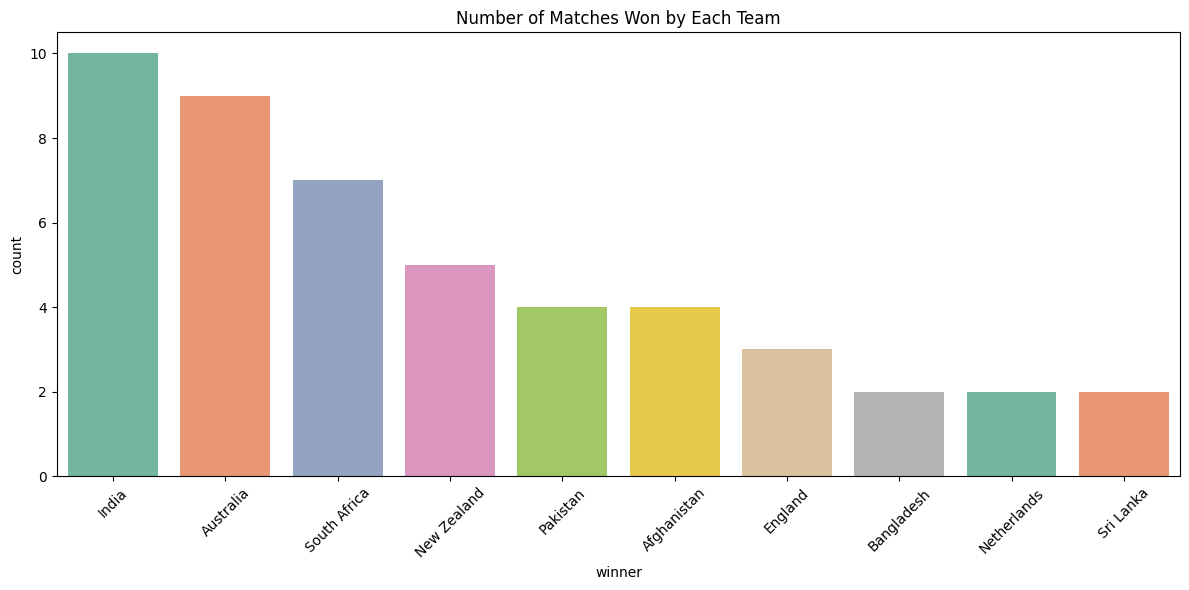

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=matches, x='winner', order=matches['winner'].value_counts().index, palette="Set2")
plt.title("Number of Matches Won by Each Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-3648680964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_win_match_win.index, y=toss_win_match_win.values, palette='coolwarm')


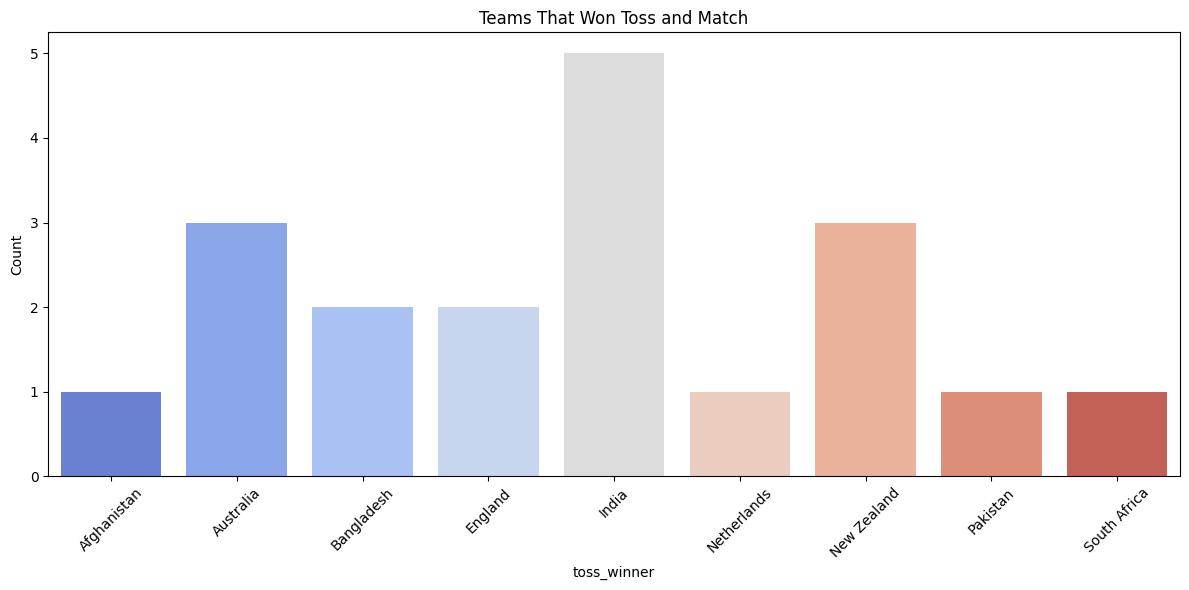

In [9]:
heatmap_data = matches[matches['toss_winner'] == matches['winner']]
toss_win_match_win = heatmap_data.groupby(['toss_winner']).size()

plt.figure(figsize=(12,6))
sns.barplot(x=toss_win_match_win.index, y=toss_win_match_win.values, palette='coolwarm')
plt.title("Teams That Won Toss and Match")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [10]:
import plotly.express as px
# Grouping data: count how many times each team won at each venue
grouped = matches.groupby(['winner', 'venue']).size().reset_index(name='win_count')
fig = px.scatter_3d(grouped,
                    x='winner',
                    y='venue',
                    z='win_count',
                    color='winner',
                    size='win_count',
                    title='3D Plot: Team Wins at Different Venues',
                    labels={"winner": "Winning Team", "venue": "Venue", "win_count": "Wins"},
                    height=600)

fig.update_layout(scene=dict(
    xaxis=dict(title='Team'),
    yaxis=dict(title='Venue'),
    zaxis=dict(title='Win Count')
))
fig.show()
